# Переформатирование данных


In [1]:
import pandas as pd
import numpy as np

###  Иерархическое индексирование

In [2]:
# создание Series с мультииндексом в виде списка списков
series1 = pd.Series(np.random.randint(10,100,9), index=[['a','a','a','b','b','b','b','c','c'],[1,2,3,4,3,1,2,1,2]])

In [3]:
series1

a  1    66
   2    91
   3    62
b  4    98
   3    88
   1    24
   2    48
c  1    61
   2    94
dtype: int32

In [4]:
series1.index  # мультииндекс можно создать отдельно для повторного использования

MultiIndex([('a', 1),
            ('a', 2),
            ('a', 3),
            ('b', 4),
            ('b', 3),
            ('b', 1),
            ('b', 2),
            ('c', 1),
            ('c', 2)],
           )

In [5]:
# обращение ко внешнему индексу
series1['a']

1    66
2    91
3    62
dtype: int32

In [6]:
series1.loc[['b','c']]

b  4    98
   3    88
   1    24
   2    48
c  1    61
   2    94
dtype: int32

In [7]:
series1.loc[:,1]  # обращение к внутреннему индексу

a    66
b    24
c    61
dtype: int32

In [8]:
# преобразование в датафрейм
df1 = series1.unstack()
df1

,1,2,3,4
a,66.0,91.0,62.0,NaN
b,24.0,48.0,88.0,98.0
c,61.0,94.0,NaN,NaN


In [9]:
# обратно к Series 
df1.stack()

a  1    66.0
   2    91.0
   3    62.0
b  1    24.0
   2    48.0
   3    88.0
   4    98.0
c  1    61.0
   2    94.0
dtype: float64

In [10]:
# В случае DataFrame иерархический индекс может существовать для любой оси 
df2 = pd.DataFrame(np.arange(12).reshape(4,3),index=[['zone1','zone1','zone2','zone2'],['lvl1','lvl2','lvl1','lvl2']],columns=[['Moscow','Moscow','Klin'],['street1','street2','street3']])
df2

Moscow            Klin
           street1 street2 street3
zone1 lvl1       0       1       2
      lvl2       3       4       5
zone2 lvl1       6       7       8
      lvl2       9      10      11

In [11]:
# уровни иерархии могут иметь имена
df2.index.names = ['zone','level']
df2.columns.names = ['city','kvartal']
df2

city         Moscow            Klin
kvartal     street1 street2 street3
zone  level                        
zone1 lvl1        0       1       2
      lvl2        3       4       5
zone2 lvl1        6       7       8
      lvl2        9      10      11

In [12]:
df2['Klin']

kvartal      street3
zone  level         
zone1 lvl1         2
      lvl2         5
zone2 lvl1         8
      lvl2        11

In [13]:
df2['Moscow'][['street1']]

kvartal      street1
zone  level         
zone1 lvl1         0
      lvl2         3
zone2 lvl1         6
      lvl2         9

### Переупорядочение и уровни сортировки

In [14]:
# перестановка уровней
df2.swaplevel(axis=0)

city         Moscow            Klin
kvartal     street1 street2 street3
level zone                         
lvl1  zone1       0       1       2
lvl2  zone1       3       4       5
lvl1  zone2       6       7       8
lvl2  zone2       9      10      11

In [15]:
df2.swaplevel(axis=1)

kvartal     street1 street2 street3
city         Moscow  Moscow    Klin
zone  level                        
zone1 lvl1        0       1       2
      lvl2        3       4       5
zone2 lvl1        6       7       8
      lvl2        9      10      11

In [16]:
# Метод sort_index по умолчанию сортирует данные лексикографически

df2.sort_index(ascending=False,axis=0, level=0)  # level= задает сортировку по определенным уровням

city         Moscow            Klin
kvartal     street1 street2 street3
zone  level                        
zone2 lvl2        9      10      11
      lvl1        6       7       8
zone1 lvl2        3       4       5
      lvl1        0       1       2

### Сводная статистика по уровню

In [17]:
df2

city         Moscow            Klin
kvartal     street1 street2 street3
zone  level                        
zone1 lvl1        0       1       2
      lvl2        3       4       5
zone2 lvl1        6       7       8
      lvl2        9      10      11

In [18]:
df2.groupby('zone').sum()

city     Moscow            Klin
kvartal street1 street2 street3
zone                           
zone1         3       5       7
zone2        15      17      19

In [19]:
df2.groupby('level').sum()

city     Moscow            Klin
kvartal street1 street2 street3
level                          
lvl1          6       8      10
lvl2         12      14      16

In [20]:
df2.groupby('city',axis=1).sum()

city         Klin  Moscow
zone  level              
zone1 lvl1      2       1
      lvl2      5       7
zone2 lvl1      8      13
      lvl2     11      19

In [21]:
df2.groupby('kvartal',axis=1).sum()

kvartal      street1  street2  street3
zone  level                           
zone1 lvl1         0        1        2
      lvl2         3        4        5
zone2 lvl1         6        7        8
      lvl2         9       10       11

### Индексирование столбцами DataFrame

In [22]:
dict_footbal = {'name':['messi','ronaldo','neymar','ibra','mbappe','ramos','alba','modric','xavi', 'de_bruyne', 'haaland'], 'speed':[7,8,9,6,10,6,7,7,7,7,9],'shoot':[10,9,7,7,8,7,6,8,7,8,8],'dribbling':[10,7,9,7,8,5,6,7,8,7,6],'pas':[10,6,8,7,7,7,8,9,9,10,6],'phy':[7,9,6,8,7,7,6,7,6,7,10],'def':[6,5,5,6,4,9,7,7,8,7,5]}

data_footbal = pd.DataFrame(dict_footbal)
data_footbal = data_footbal.set_index('name')
data_footbal
def make_position(data_football):
    '''Функция определяет позицию игрока по его данным'''
    attack = ['speed','shoot','dribbling','speed','shoot']
    middle = ['pas','phy','phy','pas','def']
    defend = ['def','phy','def','def','pas']
    data_football.loc[:,'position'] = 0
    for player in data_football.index:
        best_position = 0
        for position in attack,middle,defend:
            new_position = data_football.loc[player,position].sum()
            if new_position >= best_position:
                best_position = new_position
                if position ==attack:
                    role = 'attack'
                elif position ==middle:
                    role = 'middle'
                else:
                    role = 'defender'
        data_football.loc[player,'position'] = role
make_position(data_footbal)

In [29]:
data_footbal = data_footbal.reset_index() # cнятие индекса и перевод его в столбец

ValueError: cannot insert level_0, already exists

In [ ]:
data_footbal

In [30]:
# создадим новый индекс из столбца, но теперь многоуровневый
data_footbal = data_footbal.set_index(['name','position'])
data_footbal

,,level_0,index,speed,shoot,dribbling,pas,phy,def
name,position,,,,,,,,
messi,attack,0,0,7,10,10,10,7,6
ronaldo,attack,1,1,8,9,7,6,9,5
neymar,attack,2,2,9,7,9,8,6,5
ibra,middle,3,3,6,7,7,7,8,6
mbappe,attack,4,4,10,8,8,7,7,4
ramos,defender,5,5,6,7,5,7,7,9
alba,defender,6,6,7,6,6,8,6,7
modric,middle,7,7,7,8,7,9,7,7
xavi,defender,8,8,7,7,8,9,6,8


In [31]:
data_footbal = data_footbal.swaplevel()
data_footbal

level_0  index  speed  shoot  dribbling  pas  phy  def
position name                                                             
attack   messi            0      0      7     10         10   10    7    6
         ronaldo          1      1      8      9          7    6    9    5
         neymar           2      2      9      7          9    8    6    5
middle   ibra             3      3      6      7          7    7    8    6
attack   mbappe           4      4     10      8          8    7    7    4
defender ramos            5      5      6      7          5    7    7    9
         alba             6      6      7      6          6    8    6    7
middle   modric           7      7      7      8          7    9    7    7
defender xavi             8      8      7      7          8    9    6    8
middle   de_bruyne        9      9      7      8          7   10    7    7
attack   haaland         10     10      9      8          6    6   10    5

In [32]:
data_footbal.sort_index()   # теперь всё красиво :)

level_0  index  speed  shoot  dribbling  pas  phy  def
position name                                                             
attack   haaland         10     10      9      8          6    6   10    5
         mbappe           4      4     10      8          8    7    7    4
         messi            0      0      7     10         10   10    7    6
         neymar           2      2      9      7          9    8    6    5
         ronaldo          1      1      8      9          7    6    9    5
defender alba             6      6      7      6          6    8    6    7
         ramos            5      5      6      7          5    7    7    9
         xavi             8      8      7      7          8    9    6    8
middle   de_bruyne        9      9      7      8          7   10    7    7
         ibra             3      3      6      7          7    7    8    6
         modric           7      7      7      8          7    9    7    7

In [33]:
data_footbal.reset_index(level=(0))  # сброс всех индексов обратно в столбцы (level регулирует сброс)

,position,level_0,index,speed,shoot,dribbling,pas,phy,def
name,,,,,,,,,
messi,attack,0,0,7,10,10,10,7,6
ronaldo,attack,1,1,8,9,7,6,9,5
neymar,attack,2,2,9,7,9,8,6,5
ibra,middle,3,3,6,7,7,7,8,6
mbappe,attack,4,4,10,8,8,7,7,4
ramos,defender,5,5,6,7,5,7,7,9
alba,defender,6,6,7,6,6,8,6,7
modric,middle,7,7,7,8,7,9,7,7
xavi,defender,8,8,7,7,8,9,6,8


# Комбинирование и слияние наборов данных

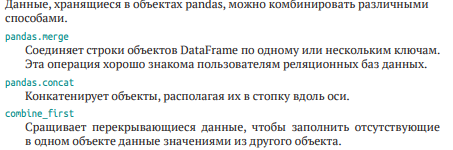

### Слияние объектов DataFrame как в базах данных

In [34]:
data_footbal

level_0  index  speed  shoot  dribbling  pas  phy  def
position name                                                             
attack   messi            0      0      7     10         10   10    7    6
         ronaldo          1      1      8      9          7    6    9    5
         neymar           2      2      9      7          9    8    6    5
middle   ibra             3      3      6      7          7    7    8    6
attack   mbappe           4      4     10      8          8    7    7    4
defender ramos            5      5      6      7          5    7    7    9
         alba             6      6      7      6          6    8    6    7
middle   modric           7      7      7      8          7    9    7    7
defender xavi             8      8      7      7          8    9    6    8
middle   de_bruyne        9      9      7      8          7   10    7    7
attack   haaland         10     10      9      8          6    6   10    5

In [35]:
dop_info = pd.DataFrame({'position':['attack','middle','defender','something'],'smile':[1,0,0,1],'speed':['fast','medium','slow','SOME']})
dop_info

,position,smile,speed
0,attack,1,fast
1,middle,0,medium
2,defender,0,slow
3,something,1,SOME


In [36]:
# слияние pd.merge(df1,df2)

pd.merge(data_footbal,dop_info,on='position')  # on - по какому стобцу сливать

,position,level_0,index,speed_x,shoot,dribbling,pas,phy,def,smile,speed_y
0,attack,0,0,7,10,10,10,7,6,1,fast
1,attack,1,1,8,9,7,6,9,5,1,fast
2,attack,2,2,9,7,9,8,6,5,1,fast
3,attack,4,4,10,8,8,7,7,4,1,fast
4,attack,10,10,9,8,6,6,10,5,1,fast
5,middle,3,3,6,7,7,7,8,6,0,medium
6,middle,7,7,7,8,7,9,7,7,0,medium
7,middle,9,9,7,8,7,10,7,7,0,medium
8,defender,5,5,6,7,5,7,7,9,0,slow
9,defender,6,6,7,6,6,8,6,7,0,slow


In [37]:
# если имена стобцов для слияние отличаются, то можно задать вручную 
dop_info['club']=True
dop_info = dop_info.rename(columns={'position':'pos'})
dop_info

,pos,smile,speed,club
0,attack,1,fast,True
1,middle,0,medium,True
2,defender,0,slow,True
3,something,1,SOME,True


In [38]:
pd.merge(data_footbal,dop_info,left_on='position',right_on='pos')

,level_0,index,speed_x,shoot,dribbling,pas,phy,def,pos,smile,speed_y,club
0,0,0,7,10,10,10,7,6,attack,1,fast,True
1,1,1,8,9,7,6,9,5,attack,1,fast,True
2,2,2,9,7,9,8,6,5,attack,1,fast,True
3,4,4,10,8,8,7,7,4,attack,1,fast,True
4,10,10,9,8,6,6,10,5,attack,1,fast,True
5,3,3,6,7,7,7,8,6,middle,0,medium,True
6,7,7,7,8,7,9,7,7,middle,0,medium,True
7,9,9,7,8,7,10,7,7,middle,0,medium,True
8,5,5,6,7,5,7,7,9,defender,0,slow,True
9,6,6,7,6,6,8,6,7,defender,0,slow,True


In [39]:
dop_info = dop_info.rename(columns={'pos':'position'})
dop_info

,position,smile,speed,club
0,attack,1,fast,True
1,middle,0,medium,True
2,defender,0,slow,True
3,something,1,SOME,True


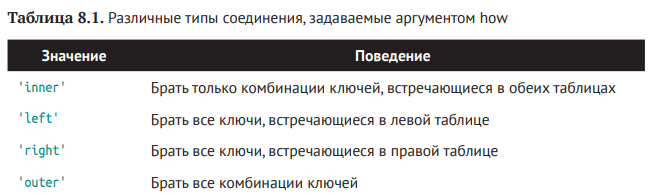

In [40]:
pd.merge(data_footbal,dop_info,left_on='position',right_on='position',how='outer')

,position,level_0,index,speed_x,shoot,dribbling,pas,phy,def,smile,speed_y,club
0,attack,0.0,0.0,7.0,10.0,10.0,10.0,7.0,6.0,1,fast,True
1,attack,1.0,1.0,8.0,9.0,7.0,6.0,9.0,5.0,1,fast,True
2,attack,2.0,2.0,9.0,7.0,9.0,8.0,6.0,5.0,1,fast,True
3,attack,4.0,4.0,10.0,8.0,8.0,7.0,7.0,4.0,1,fast,True
4,attack,10.0,10.0,9.0,8.0,6.0,6.0,10.0,5.0,1,fast,True
5,middle,3.0,3.0,6.0,7.0,7.0,7.0,8.0,6.0,0,medium,True
6,middle,7.0,7.0,7.0,8.0,7.0,9.0,7.0,7.0,0,medium,True
7,middle,9.0,9.0,7.0,8.0,7.0,10.0,7.0,7.0,0,medium,True
8,defender,5.0,5.0,6.0,7.0,5.0,7.0,7.0,9.0,0,slow,True
9,defender,6.0,6.0,7.0,6.0,6.0,8.0,6.0,7.0,0,slow,True


In [45]:
pd.merge(data_footbal,dop_info,on='position',suffixes=('_standart', '_new'))   # обработка одинаковых имён

,position,level_0,index,speed_standart,shoot,dribbling,pas,phy,def,smile,speed_new,club
0,attack,0,0,7,10,10,10,7,6,1,fast,True
1,attack,1,1,8,9,7,6,9,5,1,fast,True
2,attack,2,2,9,7,9,8,6,5,1,fast,True
3,attack,4,4,10,8,8,7,7,4,1,fast,True
4,attack,10,10,9,8,6,6,10,5,1,fast,True
5,middle,3,3,6,7,7,7,8,6,0,medium,True
6,middle,7,7,7,8,7,9,7,7,0,medium,True
7,middle,9,9,7,8,7,10,7,7,0,medium,True
8,defender,5,5,6,7,5,7,7,9,0,slow,True
9,defender,6,6,7,6,6,8,6,7,0,slow,True


In [46]:
pd.merge(data_footbal, dop_info, on='position', indicator=True, how='outer')

,position,level_0,index,speed_x,shoot,dribbling,pas,phy,def,smile,speed_y,club,_merge
0,attack,0.0,0.0,7.0,10.0,10.0,10.0,7.0,6.0,1,fast,True,both
1,attack,1.0,1.0,8.0,9.0,7.0,6.0,9.0,5.0,1,fast,True,both
2,attack,2.0,2.0,9.0,7.0,9.0,8.0,6.0,5.0,1,fast,True,both
3,attack,4.0,4.0,10.0,8.0,8.0,7.0,7.0,4.0,1,fast,True,both
4,attack,10.0,10.0,9.0,8.0,6.0,6.0,10.0,5.0,1,fast,True,both
5,middle,3.0,3.0,6.0,7.0,7.0,7.0,8.0,6.0,0,medium,True,both
6,middle,7.0,7.0,7.0,8.0,7.0,9.0,7.0,7.0,0,medium,True,both
7,middle,9.0,9.0,7.0,8.0,7.0,10.0,7.0,7.0,0,medium,True,both
8,defender,5.0,5.0,6.0,7.0,5.0,7.0,7.0,9.0,0,slow,True,both
9,defender,6.0,6.0,7.0,6.0,6.0,8.0,6.0,7.0,0,slow,True,both


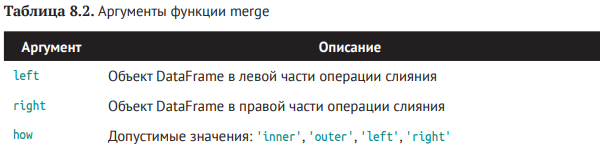
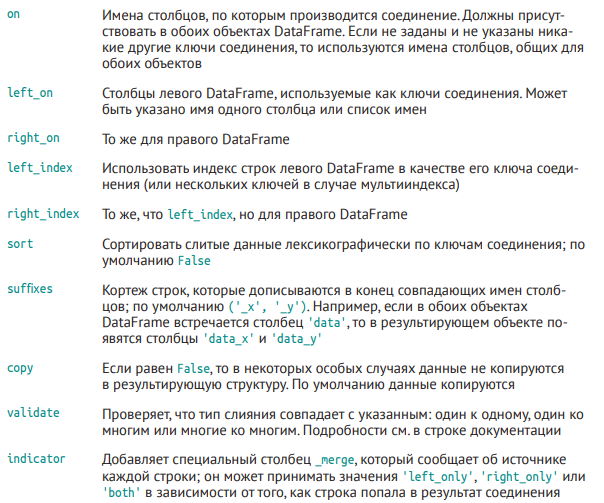

#### Соединение по индексу

In [47]:
data_hobby = pd.DataFrame({'name':['ronaldo','messi','neymar','ramos','ibra'],'games':['dota2','pes','pabg','brawl','ufc'],'hobby':['instagram','family','partys','tennis','boxing']})
data_hobby = data_hobby.set_index('name')
data_hobby

,games,hobby
name,,
ronaldo,dota2,instagram
messi,pes,family
neymar,pabg,partys
ramos,brawl,tennis
ibra,ufc,boxing


In [48]:
dict_footbal = {'name':['messi','ronaldo','neymar','ibra','mbappe','ramos','alba','modric','xavi', 'de_bruyne', 'haaland'], 'speed':[7,8,9,6,10,6,7,7,7,7,9],'shoot':[10,9,7,7,8,7,6,8,7,8,8],'dribbling':[10,7,9,7,8,5,6,7,8,7,6],'pas':[10,6,8,7,7,7,8,9,9,10,6],'phy':[7,9,6,8,7,7,6,7,6,7,10],'def':[6,5,5,6,4,9,7,7,8,7,5]}

data_footbal = pd.DataFrame(dict_footbal)
data_footbal = data_footbal.set_index('name')
data_footbal

,speed,shoot,dribbling,pas,phy,def
name,,,,,,
messi,7,10,10,10,7,6
ronaldo,8,9,7,6,9,5
neymar,9,7,9,8,6,5
ibra,6,7,7,7,8,6
mbappe,10,8,8,7,7,4
ramos,6,7,5,7,7,9
alba,7,6,6,8,6,7
modric,7,8,7,9,7,7
xavi,7,7,8,9,6,8


In [49]:
# слияние по индексу 
pd.merge(data_footbal,data_hobby,left_index=True,right_index=True, how='outer')

,speed,shoot,dribbling,pas,phy,def,games,hobby
name,,,,,,,,
alba,7,6,6,8,6,7,NaN,NaN
de_bruyne,7,8,7,10,7,7,NaN,NaN
haaland,9,8,6,6,10,5,NaN,NaN
ibra,6,7,7,7,8,6,ufc,boxing
mbappe,10,8,8,7,7,4,NaN,NaN
messi,7,10,10,10,7,6,pes,family
modric,7,8,7,9,7,7,NaN,NaN
neymar,9,7,9,8,6,5,pabg,partys
ramos,6,7,5,7,7,9,brawl,tennis


In [50]:
# слияние по индексу 
pd.merge(data_footbal,data_hobby,left_index=True,right_index=True, how='right')

,speed,shoot,dribbling,pas,phy,def,games,hobby
name,,,,,,,,
ronaldo,8,9,7,6,9,5,dota2,instagram
messi,7,10,10,10,7,6,pes,family
neymar,9,7,9,8,6,5,pabg,partys
ramos,6,7,5,7,7,9,brawl,tennis
ibra,6,7,7,7,8,6,ufc,boxing


В классе DataFrame есть и более удобный метод экземпляра **join** для слияния по 
индексу. Его также можно использовать для комбинирования нескольких объектов DataFrame, обладающих одинаковыми или похожими индексами, но непересекающимися столбцами.

In [51]:
data_footbal.join(data_hobby) # быстрое слияние по индексу (левое соединение)

,speed,shoot,dribbling,pas,phy,def,games,hobby
name,,,,,,,,
messi,7,10,10,10,7,6,pes,family
ronaldo,8,9,7,6,9,5,dota2,instagram
neymar,9,7,9,8,6,5,pabg,partys
ibra,6,7,7,7,8,6,ufc,boxing
mbappe,10,8,8,7,7,4,NaN,NaN
ramos,6,7,5,7,7,9,brawl,tennis
alba,7,6,6,8,6,7,NaN,NaN
modric,7,8,7,9,7,7,NaN,NaN
xavi,7,7,8,9,6,8,NaN,NaN


In [52]:
data_hobby.join(data_footbal)  

,games,hobby,speed,shoot,dribbling,pas,phy,def
name,,,,,,,,
ronaldo,dota2,instagram,8,9,7,6,9,5
messi,pes,family,7,10,10,10,7,6
neymar,pabg,partys,9,7,9,8,6,5
ramos,brawl,tennis,6,7,5,7,7,9
ibra,ufc,boxing,6,7,7,7,8,6


### Конкатенация вдоль оси

In [53]:
# в случае Series с разными индексами
s1 = pd.Series(np.random.randint(4,18,4),index=['bob','mary','greg','alice'])
s2 = pd.Series(np.random.randint(18,36,3),index=['egor','maxim','viny'])
s3 = pd.Series(np.random.randint(36,60,2),index = ['walter','tod'])

s4 = pd.Series(np.random.randint(10,40,3),index=['mary','egor','walter'])

In [54]:
print(s1,s2,s3,sep='\n\n')

bob       7
mary      4
greg     14
alice    12
dtype: int32

egor     19
maxim    30
viny     23
dtype: int32

walter    53
tod       59
dtype: int32


In [55]:
# конкатенация серий
pd.concat([s2,s1,s3])

egor      19
maxim     30
viny      23
bob        7
mary       4
greg      14
alice     12
walter    53
tod       59
dtype: int32

In [56]:
# если зададим конкатенацию вдоль axis=1
pd.concat([s2,s1,s3],axis=1,join='outer')  # DataFrame

,0,1,2
egor,19.0,NaN,NaN
maxim,30.0,NaN,NaN
viny,23.0,NaN,NaN
bob,NaN,7.0,NaN
mary,NaN,4.0,NaN
greg,NaN,14.0,NaN
alice,NaN,12.0,NaN
walter,NaN,NaN,53.0
tod,NaN,NaN,59.0


In [57]:
pd.concat([s1,s2,s3,s4],axis=1)

,0,1,2,3
bob,7.0,NaN,NaN,NaN
mary,4.0,NaN,NaN,22.0
greg,14.0,NaN,NaN,NaN
alice,12.0,NaN,NaN,NaN
egor,NaN,19.0,NaN,20.0
maxim,NaN,30.0,NaN,NaN
viny,NaN,23.0,NaN,NaN
walter,NaN,NaN,53.0,12.0
tod,NaN,NaN,59.0,NaN


In [58]:
# построение  иерархических индексов (параметр key)
people_series = pd.concat([s1,s2,s3],keys=['children','adult','old'])  # так намного понятнее, что и откуда
people_series

children  bob        7
          mary       4
          greg      14
          alice     12
adult     egor      19
          maxim     30
          viny      23
old       walter    53
          tod       59
dtype: int32

In [59]:
people_series.unstack()

,alice,bob,egor,greg,mary,maxim,tod,viny,walter
children,12.0,7.0,NaN,14.0,4.0,NaN,NaN,NaN,NaN
adult,NaN,NaN,19.0,NaN,NaN,30.0,NaN,23.0,NaN
old,NaN,NaN,NaN,NaN,NaN,NaN,59.0,NaN,53.0


In [60]:
people_data  = pd.concat([s1,s2,s3,s4],keys=['child','adult','old','something'],axis=1)  # ключи стали названиями столбцов
people_data

,child,adult,old,something
bob,7.0,NaN,NaN,NaN
mary,4.0,NaN,NaN,22.0
greg,14.0,NaN,NaN,NaN
alice,12.0,NaN,NaN,NaN
egor,NaN,19.0,NaN,20.0
maxim,NaN,30.0,NaN,NaN
viny,NaN,23.0,NaN,NaN
walter,NaN,NaN,53.0,12.0
tod,NaN,NaN,59.0,NaN


In [61]:
# в случае датафреймов
pd.concat([data_footbal,data_hobby],axis=1, keys=['ПЕРВЫЙ ФРЕЙМ','ВТОРОЙ ФРЕЙМ'],names=['frames','info'])

frames    ПЕРВЫЙ ФРЕЙМ                             ВТОРОЙ ФРЕЙМ           
info             speed shoot dribbling pas phy def        games      hobby
name                                                                      
messi                7    10        10  10   7   6          pes     family
ronaldo              8     9         7   6   9   5        dota2  instagram
neymar               9     7         9   8   6   5         pabg     partys
ibra                 6     7         7   7   8   6          ufc     boxing
mbappe              10     8         8   7   7   4          NaN        NaN
ramos                6     7         5   7   7   9        brawl     tennis
alba                 7     6         6   8   6   7          NaN        NaN
modric               7     8         7   9   7   7          NaN        NaN
xavi                 7     7         8   9   6   8          NaN        NaN
de_bruyne            7     8         7  10   7   7          NaN        NaN
haaland              9     8         6   6  10   5          NaN        NaN

In [62]:
# можно покороче
pd.concat({'ONE':data_footbal, 'TWO':data_hobby},axis=1)

ONE                                TWO           
          speed shoot dribbling pas phy def  games      hobby
name                                                         
messi         7    10        10  10   7   6    pes     family
ronaldo       8     9         7   6   9   5  dota2  instagram
neymar        9     7         9   8   6   5   pabg     partys
ibra          6     7         7   7   8   6    ufc     boxing
mbappe       10     8         8   7   7   4    NaN        NaN
ramos         6     7         5   7   7   9  brawl     tennis
alba          7     6         6   8   6   7    NaN        NaN
modric        7     8         7   9   7   7    NaN        NaN
xavi          7     7         8   9   6   8    NaN        NaN
de_bruyne     7     8         7  10   7   7    NaN        NaN
haaland       9     8         6   6  10   5    NaN        NaN

In [63]:
# !!!!  ЕСЛИ ИНДЕКС не содержит релевантных данных
s11 = pd.Series(np.random.randint(40,180,4))
s22 = pd.Series(np.random.randint(180,360,3))
s33 = pd.Series(np.random.randint(360,600,2))
data_not_relevant = pd.DataFrame([s11,s22,s33],index=['child','adult','old']).T

In [64]:
data_not_relevant

,child,adult,old
0,164.0,193.0,492.0
1,101.0,183.0,570.0
2,145.0,253.0,NaN
3,55.0,NaN,NaN


In [65]:
people_data

,child,adult,old,something
bob,7.0,NaN,NaN,NaN
mary,4.0,NaN,NaN,22.0
greg,14.0,NaN,NaN,NaN
alice,12.0,NaN,NaN,NaN
egor,NaN,19.0,NaN,20.0
maxim,NaN,30.0,NaN,NaN
viny,NaN,23.0,NaN,NaN
walter,NaN,NaN,53.0,12.0
tod,NaN,NaN,59.0,NaN


In [66]:
pd.concat([people_data,data_not_relevant],ignore_index=True, axis=0)  # конкатенация вдоль оси строк

,child,adult,old,something
0,7.0,NaN,NaN,NaN
1,4.0,NaN,NaN,22.0
2,14.0,NaN,NaN,NaN
3,12.0,NaN,NaN,NaN
4,NaN,19.0,NaN,20.0
5,NaN,30.0,NaN,NaN
6,NaN,23.0,NaN,NaN
7,NaN,NaN,53.0,12.0
8,NaN,NaN,59.0,NaN
9,164.0,193.0,492.0,NaN


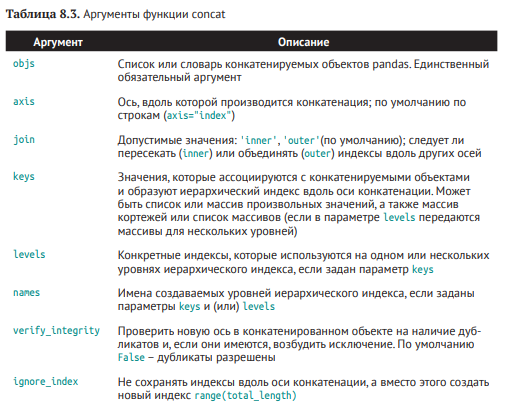

##### Комбинирование перекрывающихся данных

In [67]:
people_series

children  bob        7
          mary       4
          greg      14
          alice     12
adult     egor      19
          maxim     30
          viny      23
old       walter    53
          tod       59
dtype: int32

In [68]:
s4

mary      22
egor      20
walter    12
dtype: int32

In [69]:
pd.concat([people_series,s4],axis=0)  # WOW!

(children, bob)       7
(children, mary)      4
(children, greg)     14
(children, alice)    12
(adult, egor)        19
(adult, maxim)       30
(adult, viny)        23
(old, walter)        53
(old, tod)           59
mary                 22
egor                 20
walter               12
dtype: int32

In [70]:
s1

bob       7
mary      4
greg     14
alice    12
dtype: int32

In [71]:
s2['bob'] = np.nan
s2

egor     19.0
maxim    30.0
viny     23.0
bob       NaN
dtype: float64

In [72]:
s1['alex'] = 11
s1

bob       7
mary      4
greg     14
alice    12
alex     11
dtype: int64

In [73]:
np.where(s2.isna(),s1,s2)  # короче выравнивать данные через where не получится !!! error

ValueError: operands could not be broadcast together with shapes (4,) (5,) (4,) 

In [74]:
a = pd.Series([np.nan, 14, 18, np.nan, 38, np.nan],index=["Ваня", "Саша", "Славик", "КПСС", "Оксимирон", "Ирина"])
a

Ваня          NaN
Саша         14.0
Славик       18.0
КПСС          NaN
Оксимирон    38.0
Ирина         NaN
dtype: float64

In [75]:
b = pd.Series([20, np.nan, 18, 33, np.nan, np.nan],index=["Ваня", "Саша", "Славик", "КПСС", "Оксимирон", "Ирина"])
b

Ваня         20.0
Саша          NaN
Славик       18.0
КПСС         33.0
Оксимирон     NaN
Ирина         NaN
dtype: float64

In [76]:
a.combine_first(b)

Ваня         20.0
Саша         14.0
Славик       18.0
КПСС         33.0
Оксимирон    38.0
Ирина         NaN
dtype: float64

combine_first делает то же самое для каждого столбца, так что можно считать, что он «подставляет» вместо данных, отсутствующих в вызывающем объекте, данные из объекта, переданного в аргументе

##  Изменение формы и поворот

Cуществует ряд фундаментальных операций реорганизации табличных данных. Иногда их называют изменением формы (reshape), а иногда – поворотом
(pivot).

#### Изменение формы с помощью иерархического индексирования

In [77]:
data_footbal

,speed,shoot,dribbling,pas,phy,def
name,,,,,,
messi,7,10,10,10,7,6
ronaldo,8,9,7,6,9,5
neymar,9,7,9,8,6,5
ibra,6,7,7,7,8,6
mbappe,10,8,8,7,7,4
ramos,6,7,5,7,7,9
alba,7,6,6,8,6,7
modric,7,8,7,9,7,7
xavi,7,7,8,9,6,8


In [78]:
data_footbal.stack() # перенос данных из столбцов в строки

name              
messi    speed         7
         shoot        10
         dribbling    10
         pas          10
         phy           7
                      ..
haaland  shoot         8
         dribbling     6
         pas           6
         phy          10
         def           5
Length: 66, dtype: int64

In [79]:
people_series.unstack(level=0)  # перенос данных из строк в столбцы

,children,adult,old
alice,12.0,NaN,NaN
bob,7.0,NaN,NaN
egor,NaN,19.0,NaN
greg,14.0,NaN,NaN
mary,4.0,NaN,NaN
maxim,NaN,30.0,NaN
tod,NaN,NaN,59.0
viny,NaN,23.0,NaN
walter,NaN,NaN,53.0


In [80]:
people_series

children  bob        7
          mary       4
          greg      14
          alice     12
adult     egor      19
          maxim     30
          viny      23
old       walter    53
          tod       59
dtype: int32

### Поворот из «длинного» в «широкий» формат

In [81]:
data_hobby.pivot(columns='games')

hobby                                   
games     brawl      dota2    pabg     pes     ufc
name                                              
ibra        NaN        NaN     NaN     NaN  boxing
messi       NaN        NaN     NaN  family     NaN
neymar      NaN        NaN  partys     NaN     NaN
ramos    tennis        NaN     NaN     NaN     NaN
ronaldo     NaN  instagram     NaN     NaN     NaN

In [82]:
long_format = data_footbal.stack().reset_index() # длинный формат данных(1 наблюдение - 1 строка)
long_format.columns = ['name','item','value']
long_format

,name,item,value
0,messi,speed,7
1,messi,shoot,10
2,messi,dribbling,10
3,messi,pas,10
4,messi,phy,7
...,...,...,...
61,haaland,shoot,8
62,haaland,dribbling,6
63,haaland,pas,6
64,haaland,phy,10


In [ ]:
# обычно с такими данными работать трудно, поэтому лучше представить их в формате датафрейма
# из длинного в широкий формат
data1 = long_format.pivot(columns='item',index='name')
data1  # вот теперь удобнее

In [ ]:
long_format

In [ ]:
long_format.pivot('name', 'item')

In [ ]:
# Отметим, что метод pivot  – эквивалент создания иерархического индекса 
#      методом set_index с последующим вызовом unstack

## Поворот из «широкого» в «длинный» формат
Обратной к pivot операцией является pandas.melt. Вместо того чтобы преобразовывать один столбец в несколько в новом объекте DataFrame, она объединяет 
несколько столбцов в один, порождая DataFrame длиннее входного.

In [ ]:
data_hobby

In [ ]:
data2 = data_footbal.reset_index()
data2

In [ ]:
# из широкого формата в длинный
melted_data = data2.melt(id_vars='name')  # индикатор группы - name
melted_data

In [ ]:
melted_data.pivot('name','variable')  # и обратно в широкий формат :)

In [ ]:
data2.melt(id_vars='name',value_vars=['speed','dribbling'])  # можно выбирть подмножество для роли значений